<a id='top'></a>
## Systems and Mechanistic Models - Some Examples

[Logistic Growth Model](#logistic)

[Logistic Growth Model with Time Delay](#logistic_td)

[Lotka Volterra Predator Prey Model](#lvpp)

[Lotka Volterra Competition Model](#lvcomp)

[Overshoot and Collapse](#overshoot)

[Bioreactor Model](#bioreactor1)

[Zombie Apocalypse](#zombie)

[Aquaponics System](#aquaponics)

<hr><a id='logistic'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

## Logistic Growth

Our first model is one we seen a number of times - logistic growth.  The model is:

$\large \frac{dN}{dt} = kN[1-\frac{N}{N_{max}}]$

We will solve this with the `odeint()` method in the **scipy.integrate** package.  This is a general-purpose solver for systems of ordinary differential equations.


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k = 0.02
Nmax = 100
N0 = 1

def LogisticModel( Y,t ):
    N = Y[0]
    return k*N*(1-N/Nmax)

times = np.arange(0,1000.1,1)
Y = odeint( LogisticModel, [N0], times )

yExact = Nmax/(1+((Nmax/N0)-1)*np.exp(-k*times))

print(Y)

plt.plot(times,Y, color='blue')
plt.plot(times,yExact, color='red')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title( 'Logistic Model')
plt.show()


<hr><a id='logistic_td'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

## Logistic Growth with TIme Delay (with Euler integrator)

This time, we will implement a simple Euler integrator 

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameters
k = 0.02
Nmax = 100
N0 = 1
delay = 0
dt = 100
delaySteps = (int) (delay/dt)

# the model function
def LogisticModelWithTimeDelay( N, Ndelay ):
    return k*N*(1-Ndelay/Nmax)

# start integrating
times = np.arange(0,1000.1, dt)
y = np.zeros( len(times) )

y[0] = N0; i=0    # set initial conditions
for t in times:       # loop through time
    if t > 0:         
        Ndelay = N0
        if ( t >= delay ):
            Ndelay = y[i-delaySteps-1]
            
        N = y[i-1]

        # perform euler step - N(i+1)=N(i)+(dN/dt)*dt
        y[i] = N + LogisticModelWithTimeDelay( N, Ndelay ) * dt  # euler integration step
        
    i += 1
        
plt.plot(times,y, color='blue')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title( 'Logistic Model with Time Delay')
plt.show()

## Logistic Growth with TIme Delay (Runge Kutta)

This time, we will implement a Runge-Kutta fourth order integrator 

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
k = 0.02
Nmax = 100
N0 = 1
delay = 50
dt = 0.1
delaySteps = (int) (delay/dt)

def LogisticModelWithTimeDelay( N, Ndelay ):
    return k*N*(1-Ndelay/Nmax)

times = np.arange(0,1000.1, 0.1)
y = np.zeros( len(times) )

y[0] = N0; i=0    # set initial conditions
for t in times:       # loop through time
    if t > 0:         
        Ndelay = N0
        if ( t >= delay ):
            Ndelay = y[i-delaySteps-1]
            
        N = y[i-1]
       
        y[i] = N + LogisticModelWithTimeDelay( N, Ndelay ) * dt  # euler integration step
        
        k1 = LogisticModelWithTimeDelay(N, Ndelay )     # evaluate derivative at left side
        k2 = LogisticModelWithTimeDelay(N + (0.5 * dt * k1), Ndelay)  # and the middle
        k3 = LogisticModelWithTimeDelay(N + (0.5 * dt * k2), Ndelay)  # middle again
        k4 = LogisticModelWithTimeDelay(N + (dt*k3), Ndelay )                     # right side
        y[i] = N + ((dt * (k1 + 2*k2 + 2*k3 + k4)) / 6);    # update state variable
    i += 1
        
plt.plot(times,y, color='blue')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title( 'Logistic Model with Time Delay')
plt.show()

<hr><a id='lvpp'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

## Lotka Volterra Predator Prey Model

$\large \frac{dH}{dt} = r_H H - aHP$

$\large \frac{dP}{dt} = -r_P P + bHP$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters
rH = 0.2
a = 0.1
rP = 0.2
b = 0.75*a

# define the model
def LVPredatorPrey(y, t):
    prey = y[0]
    pred = y[1]
    du_dt = rH*prey - a*prey*pred    # prey
    dv_dt = -rP * pred + b * prey*pred  # predator
    return [du_dt, dv_dt]


end = 500; dt = 0.1      # basic simulation parameters
times = np.arange( 0, end+dt, dt )  # create time values

Y = odeint( LVPredatorPrey, [2,2], times )   # integrate

# plot results
Prey = Y[:,0]
Predator = Y[:,1]

plt.subplot(1,2,1)
plt.plot(times, Prey, 'r-', label='Prey')
plt.plot(times, Predator, 'b-', label='Predators')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka Volterra Predator/Prey Model')


rH = rH *0.5
Y = odeint( LVPredatorPrey, [10,5], times )   # integrate

# plot results
Prey1 = Y[:,0]
Predator1 = Y[:,1]


plt.subplot(1,2,2)
plt.plot(times, Prey1, 'r-', label='Prey')
plt.plot(times, Predator1, 'b-', label='Predators')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka Volterra Predator/Prey Model')

plt.tight_layout()
plt.show()

### ...and a state space plot

In [ ]:

preyMax = np.max(Prey)
predMax = np.max(Predator)

X = np.linspace(0,preyMax,18)    # position of the arrows
Y = np.linspace(0,predMax,18)
U, V = np.meshgrid(X, Y)

for i in range(0,len(X)):
    prey = X[i]
    for j in range(0,len(Y)):
        pred = Y[j]
        [dU,dV] = LVPredatorPrey([prey, pred], 0)

        U[j,i] = dU # np.log(dU)
        V[j,i] = dV

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
#ax.quiverkey(q, X=0.3, Y=1.1, U=10,
#             label='Quiver key, length = 10', labelpos='E')


ax.plot( Prey,Predator, '-', color='red')

plt.xlabel("Prey")
plt.ylabel("Predator")
plt.show()


### ...and let's find equilibrium points 

In [ ]:
'''
Basic idea is to try a bunch of starting points through the state space of interest, 
and see what equilibrium points are reached from those start points.

We will collect these in a dictionary with the fish value as the key, and the 
O2 value as the value, to consolidate multiple starting point that converge to the 
same equilibrium points

We'll use scipy.optimize.fsolve() to find the roots (equilibrium points) of the model
'''

import numpy as np
from scipy.optimize import fsolve


roots = []   # make an empty list - this will be used to store unique equilibrium points pairs

# iterate through the state space defined by Predators, Prey
for prey in np.arange(0,20):
    for pred in np.arange(0,20):
        x = fsolve( LVPredatorPrey, [prey,pred], 0)
            
        # have we seen either of these ones before?  Note that 
        found= False
        for pt in roots:
            if abs(x[0]-pt[0]) < 0.1 or abs(x[1]-pt[1]) < 0.01:
                found=True
                break
             
        if not found:
            if abs(x[0]) < 0.01:
                x[0] = 0
                
            if abs(x[1]) < 0.001:
                x[1] = 0
            roots.append(x)            
            
print('Equilibrium points:')
     
for pt in roots:
    print("({:.3},{:.3})".format(pt[0],pt[1]))

#### and equilibrium points as a (reusable) function

In [ ]:
'''
Basic idea is to try a bunch of starting points through the state space of interest, 
and see what equilibrium points are reached from those start points.

We will collect these point pairs in an array, to consolidate multiple starting point that converge to the 
same equilibrium points

We'll use scipy.optimize.fsolve() to find the roots (equilibrium points) of the model
'''

import numpy as np
from scipy.optimize import fsolve

def FindEquilibriumPoints2D( ModelFn, s1Range, s2Range, s1Tol=0.1, s2Tol=0.1):

    roots = []   # make an empty list - this will be used to store unique equilibrium points pairs

    # iterate through the state space defined by Predators, Prey
    for s1 in s1Range:
        for s2 in s2Range:
            eqPt = fsolve( ModelFn, [s1,s2], 0)
            
            # have we seen either of these ones before?  Note that in order to avoid
            # problems with floating point numbers, we c
            found= False
            for pt in roots:
                if abs(eqPt[0]-pt[0]) < s1Tol or abs(eqPt[1]-pt[1]) < s2Tol:
                    found=True
                    break
             
            if not found:
                roots.append(eqPt)  
                
    return roots

                
roots = FindEquilibriumPoints2D( LVPredatorPrey, np.arange(0,20), np.arange(0,20))
                
print('Equilibrium points:')
     
for pt in roots:
    print("({:.3},{:.3})".format(pt[0],pt[1]))


<hr><a id='lvcomp'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

## The Lotka Volterra Competition Model

Next we will extend the logistic growth model to encompass two species, resulting in two state equations, one describing the dynamics of each species.  Further, we will introduce the concept of competition as an additional reduction in growth rate, reducing it by a factor described by the product of the population size of the competitor species and the “competitiveness” of the competitor species, captured by the model parameter a12 above.  The factor measures the competitive effect of the competitor species on the target species, with higher values indicating a stronger competitor.  We apply this concept to both species, resulting in the Lotka-Volterra competition model shown here.   

$ \frac{dN_1}{dt} = r_1 N_1 (1-(N_1+a_{12} N_2)/K_1) $

$ \frac{dN_2}{dt} = r_2 N_2 (1-(N_2+a_{21} N_1)/K_2) $


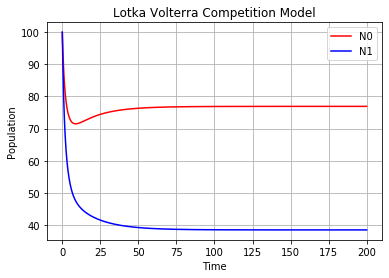

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters
r1=0.3
r2 = 0.4
a12 = 0.6
a21 = 0.8
K1 = 100
K2 = 100

# define the model
def LVCompetition(y, t):
    N1 = y[0]
    N2 = y[1]
    dN1_dt = r1*N1*(1-(N1 + a12*N2)/K1)
    dN2_dt = r2*N2*(1-(N2 + a21*N1)/K2)
    return [dN1_dt, dN2_dt]

end = 200; dt = 0.1      # basic simulation parameters
times = np.arange( 0, end+dt, dt )  # create time values

Y = odeint( LVCompetition, [100,100], times )   # integrate

# plot results
N0 = Y[:,0]
N1 = Y[:,1]

#plt.subplot(2, 1, 1 )
plt.plot(times, N0, 'r-', label='N0')
plt.plot(times, N1, 'b-', label='N1')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka Volterra Competition Model')

#plt.subplot(2, 1, 2 )
#plt.plot(prey, predator, 'r-', label='Prey')
#plt.grid()
#plt.legend(loc='best')
#plt.xlabel('Prey')
#plt.ylabel('Predator')
#plt.title('Lotka Volterra State-Space Diagram')
#plt.tight_layout()
plt.show()


#### with another state-space plot

[100.          98.26941279  96.66802535 ...  76.92294991  76.92295062
  76.92295133] [100.          96.93805128  94.13027115 ...  38.46169863  38.46169773
  38.46169683]


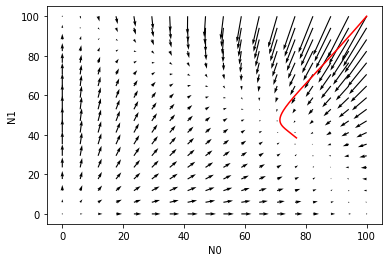

In [15]:

N0Max = np.max(N0)
N1Max = np.max(N1)

X = np.linspace(0,N0Max,18)    # position of the arrows
Y = np.linspace(0,N1Max,18)
U, V = np.meshgrid(X, Y)

for i in range(0,len(X)):
    n0 = X[i]
    for j in range(0,len(Y)):
        n1 = Y[j]
        [dU,dV] = LVCompetition([n0,n1], 0)

        U[j,i] = dU # np.log(dU)
        V[j,i] = dV

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
#ax.quiverkey(q, X=0.3, Y=1.1, U=10,
#             label='Quiver key, length = 10', labelpos='E')


ax.plot( N0,N1, '-', color='red')
print(N0,N1)

plt.xlabel("N0")
plt.ylabel("N1")
plt.show()

<hr><a id='overshoot'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

## Overshoot and Collapse

Our first example will model a population coupled to a resource base

Assumptions:

There are two pools:  Population and Resource

Resources are consumed at a constant per-capita rate, and are non-renewable
The Population is influenced by birth and death: birth is a constant per-capita rate; the size of the Resource base influences the death rate of the population according to: 
  $ Death Rate = 1-( R(t)/R_0 )  $
  
  
The resulting model is:

$\large \frac{dP}{dt} = (b-(1-\frac{R}{R_0})) P $

$\large \frac{dR}{dt} = -c P $


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

P0 = 100
R0 = 1000
b = 0.1
c = 0.001

def OvershootAndCollapse( Y, t ):
    P = Y[0]
    R = Y[1]

    dPdt = (b - ( 1-R/R0)) * P          # Mass balance of cells
    dRdt = -c*P
    return [ dPdt, dRdt ]

end = 200; dt = 0.01      # basic simulation parameters
time = np.arange( 0, end, dt )  # create time values

Y = odeint( OvershootAndCollapse, [P0,R0], time )   # integrate

# plot results
P = Y[:,0]
R = Y[:,1]

plt.plot(time, P, 'g-', label='Population')
plt.plot(time, R, 'b-', label='Resource')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.title('Overshoot and Collapse')

plt.show()


<hr><a id='bioreactor1'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

## Bioreactor Problem

**The system**: A bioreactor growing bacteria consuming a substrate to produce a product, e.g. an Anaerobic Digester producing methane form animal waste.

**Assumptions**:
* This is a continuous flow reactor, with inflow containing the substrate at 10 g/L at a flow rate of 0.5 L/L-day.
* The bacteria grow according to Monod kinetics, with µmax =1.2 g/L-day and Ks=2.6 g/L.
* The bacteria die at a constant per-capita rate of 3% per day.
* Each gram of bacterial growth requires 2.4 grams of substrate.
* Product is produced at a rate proportional to rate of substrate consumption via bacterial growth – each gram of substrate consumed produces 0.25 grams of Product.
* Initially, there are 1, 20, and 0 grams of Bacteria, Substrate, and Product in the system.

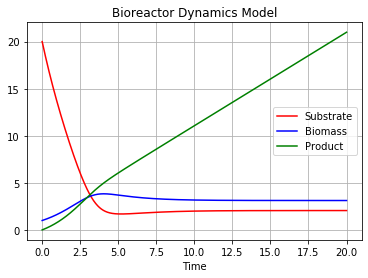

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

muMax=1.2; kS=2.6; kd=0.03; kyP=0.25; kyS=2.4  #define parameters
f = 0.5; Sin = 10

def bioreactor( Y, t ):
    S = Y[0]
    X = Y[1]
    P = Y[2]
    
    mu=((muMax*S)/(kS+S))  # Bacterial Growth Rate - Monod Kinetics

    dXdt = -f*(X-0) + mu*X - kd*X          # Mass balance of cells
    dSdt = -f*(S-Sin) - kyS*mu*X
    dPdt = kyP*kyS*mu*X                   # Mass balance of products
    return [ dSdt, dXdt, dPdt ]

s0 = 20     # Initial conditions
x0 = 1
p0 = 0
end = 20; dt = 0.01      # basic simulation parameters
time = np.arange( 0, end+dt/2, dt )  # create time values

Y = odeint( bioreactor, [s0, x0, p0], time )   # integrate

# plot results
S = Y[:,0]
X = Y[:,1]
P = Y[:,2]

plt.plot(time, S, 'r-', label='Substrate')
plt.plot(time, X, 'b-', label='Biomass')
plt.plot(time, P, 'g-', label='Product')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.title('Bioreactor Dynamics Model')

plt.show()


### Find the flow rate that optimizes the production of the product P for this system

A couple of hints:

1) Since we are trying to optimize a single parameter, f, use scipy.optimize.minimize_scalar().  See the docs https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize_scalar.html.  The default arguments should work fine in this case.

2) The above mentioned function find the MINIMUM of a scalar function, but remember you are trying to find a MAXIMUM.  How do you make a maximization process look like a minimization process?

3) Define a `Cost()` function that runs the model for a specified flow rate and returns the value you are trying to mimimize.  This is the function that you will hand to `mimimize_scaler()` 

4) Because `f` is the variable the Cost function will need to set, you should declare it as **global** in your Cost function before setting it.

In [ ]:
from scipy.optimize import minimize_scalar

def Cost(flowrate):
    if flowrate < 0:
        return 999999999
    
    global f
    f = flowrate
    Y = odeint( bioreactor, [s0,x0,p0], times )
    finalP = Y[-1,2]
    print( "Flow: {:.4}   FinalP: {:.4}".format(flowrate, finalP))
    return -finalP
        
result = minimize_scalar(Cost)
print( "\nOptimal \nFlow Rate: {:.3}".format(result.x))

### Identify any equilibrium points for the combined Substrate and Biomass in the range 0,0 - 10,10 in state space

Include how you identified these points.  Note, because we are not concerned about the product P, you may consider putting in a "helper" function that removes the third state variable from the search.

In [ ]:
'''
Basic idea is to try a bunch of starting points through the state space of interest, 
and see what equilibrium points are reached from those start points.

We will collect these point pairs in an array, to consolidate multiple starting point that converge to the 
same equilibrium points

Well use scipy.optimize.fsolve() to find the roots (equilibrium points) of the model
'''

def bioreactor2(S):
    Y = np.append(S,0)
    pts = bioreactor(Y,0)
    return pts[:-1]


import numpy as np
from scipy.optimize import fsolve

def FindEquilibriumPoints2D( ModelFn, s1Range, s2Range, s1Tol=0.01, s2Tol=0.01):

    roots = []   # make an empty list - this will be used to store unique equilibrium points pairs

    # iterate through the state space defined by s1, s2 state variable
    for s1 in s1Range:
        for s2 in s2Range:
            eqPt = fsolve( ModelFn, [s1,s2])
            
            # have we seen either of these ones before?  Note that in order to avoid
            # problems with 
            found= False
            for pt in roots:
                if abs(eqPt[0]-pt[0]) < 0.1 or abs(eqPt[1]-pt[1]) < 0.1:
                    found=True
                    break
             
            if not found:
                if abs(eqPt[0]) < 0.01:
                    eqPt[0] = 0
                
                if abs(eqPt[1]) < 0.001:
                    eqPt[1] = 0
            
                roots.append(eqPt)
                
    return roots



            
roots = FindEquilibriumPoints2D( bioreactor2, np.arange(0,5,.1), np.arange(0,.05,.001))

print('Equilibrium points:')
     
for pt in roots:
    print("({:.3},{:.3})".format(pt[0],pt[1]))

<hr><a id='zombie'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

# Zombie Apocalypse

In this assignment we will create a basic population dynamics model exploring Zombie attack behavior and subsequent effects on non-infected (susceptible) human populations. The model considers three “stocks” (state variables) as follows:

1. ** Humans (H) **

2. ** Zombies (Z) **

3. ** The Dead (D) **

** Assumptions included in this model follow: **

1. The Dead class consists of individuals who have died, either through attack or natural causes.
2. The Human birth rate is a constant per-capita rate (parameter kBirth) 
3. Humans become deceased through ‘natural’ causes, i.e., non-Zombie-related death at a rate proportional to the Human population size (parameter kDeath). 
4. Humans in the Dead class can resurrect and become a Zombie at a rate proportional to the Dead population (parameter kRes).
5. Humans can become Zombies through infection via an **interaction** with a Zombie (infection transmission parameter kTrans)
6. Only Humans can become infected through contact with Zombies, and Zombies only have a craving for Human flesh so we do not consider any other life forms in the model. 
7. New zombies can only come from two sources:
    1. Through resurrection of the Dead.
    2. Humans who have had an “encounter” with a Zombie and become infected.
8. Zombies can be killed (removing the head or destroying the brain of the Zombie) as a result of an **interaction** with a Human (parameter kRemoved)
9. Zombies do not attack/defeat other zombies.

The model is derived from these assumptions as follows:

**Processes (Rates):**

$  birth = k_{Birth} H $
 
 $  death = k_{Death} H $
 
 $  resurrection = k_{Res} D $
 
 $  infection = k_{Trans} H Z $
 
 $  removed = k_{Removed} H Z $
 

**Resulting differential equations describing population dynamics:**

$ \frac{dH}{dt} =  birth - death  - infection $

$ \frac{dZ}{dt} = resurrection + infection - removed $

$ \frac{dD}{dt} = -resurrection + death + removed $


** Parameter Values: **

Parameter | Definition | Value
--------- | ---------- | -----
`kRemoved` | Zombie mortality from H/Z interactions parameter (Z->R) | 0.005
`kTrans` | Human infection from H/Z transmission interaction parameter (H->Z) | 0.0095
`kRes` | per-capita resurrection rate for dead (Removed) (R->Z) | 0.0001
`kDeath` | per-capita death rate for Humans through natural mortality (H->R) | 0.001
`kBirth` | human birth rate (absolute rate) ( ->H) | 0.025

** Initial Conditions: ** Humans: H0=500, Zombies: Z0=0, Dead: D0=0
 

In [ ]:
""" 
Basic steps:

1) create model function capturing state equations
2) run model using scipy.optimize.odeint()
3) generate outputs
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# define model parameters

## TODO: add remaining parameters

# First, define parameters
kRemoved = 0.015     # Zombie mortality from H/Z interactions parameter (Z->R) (alpha)
kTrans = 0.0095      # Human infection from H/Z transmission interaction parameter (H->Z) (beta)
kRes = 0.0001        # per-capita resurrection rate for dead (Removed) (R->Z) (zeta)
kDeath = 0.001       # per-capita death rate for Humans through natural mortality (H->R) (delta)
kBirth = 0.025       # human birth rate (absolute rate) ( ->H)

"""
Next, define the model function - three state variables
 1) dH/dt = birth (kBirth*H) - infection (kTrans*H*Z) - mortality (kDeath*H)
 2) dZ/dt = infection (kTrans*H*Z) + resurrection (kRes*R) - mortality (kRemoved*H*Z)
 3) dD/dt = human mortality (kDeath*H) + zombie mortality (kRemoved*H*Z) - resurrection (kRes*R)
"""

# define model function (y=current state variable value array, t=current time)
def theModel(y,t):
    H=y[0]
    Z=y[1]
    D=y[2]

    birth = kBirth*H
    death = kDeath*H
    resurrection = kRes*D
    infection = kTrans*H*Z 
    removed = kRemoved*H*Z

    dH_dt = birth - death  - infection
    dZ_dt = resurrection + infection - removed
    dD_dt = -resurrection + death + removed
    return [dH_dt, dZ_dt, dD_dt]



# make an array of time values for which we want to collect output
end = 100
times = np.arange(0, end, 0.01)

H0 = 50
Z0 = 0
D0 = 0

Y = odeint(theModel, [H0,Z0,D0], times)

# plot results
HModeled = Y[:,0]
ZModeled = Y[:,1]
DModeled = Y[:,2]

# plot results
# first, a Time-series plot showing Human and Zombie Populations as functions of time.

plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1 )
plt.plot(times, HModeled, 'r-', label='Humans')
plt.plot(times, ZModeled, 'b-', label='Zombies')
plt.plot(times, DModeled, 'g-', label='Dead')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('States through time')

# second, a “State-space” plot showing the trajectory of the model through time, showing  
plt.subplot(2, 1, 2)
plt.plot( HModeled, ZModeled, 'r-', label='' )
plt.grid()
plt.xlabel('Humans')
plt.ylabel('Zombies')
plt.title('State-Space Diagram')

plt.tight_layout()
plt.show()

#### Any Equilibrium Points?

In [ ]:
'''
Basic idea is to try a bunch of starting points through the state space of interest, 
and see what equilibrium points are reached from those start points.

We will collect these point pairs in an array, to consolidate multiple starting point that converge to the 
same equilibrium points

We'll use scipy.optimize.fsolve() to find the roots (equilibrium points) of the model
'''

import numpy as np
from scipy.optimize import fsolve

def FindEquilibriumPoints3D( ModelFn, s1Range, s2Range, s3Range, s1Tol=0.1, s2Tol=0.1,s3Tol=0.1):

    roots = []   # make an empty list - this will be used to store unique equilibrium points pairs

    # iterate through the state space defined by s1, s2 state variable
    for s1 in s1Range:
        for s2 in s2Range:
            for s3 in s3Range:
                eqPt = fsolve( ModelFn, [s1,s2,s3],  0)
            
                # have we seen either of these ones before?  Note that in order to avoid
                # problems with 
                found= False
                for pt in roots:
                    if abs(eqPt[0]-pt[0]) < s1Tol or abs(eqPt[1]-pt[1]) < s2Tol or abs(eqPt[2]-pt[2]) < s3Tol:
                        found=True
                        break
             
                if not found:
                    roots.append(eqPt)
                
    return roots



roots = FindEquilibriumPoints3D( theModel, np.arange(0,100), np.arange(0,100), np.arange(0,100))
            
print('Equilibrium points:')
     
for pt in roots:
    print("({:.3},{:.3},{:.3})".format(pt[0],pt[1], pt[2]))

<hr><a id='aquaponics'></a><div style='text-align:right;width=100%'><a href='#top'>top</a></div>

## Aquaponics System


Growth Function for plants

$ \large m_{max} \frac{S}{k_s + S} = m_{max} \frac{1}{\frac{k_s}{S} + 1} $

Growth/Toxicity Function for Fish

$ \large m_{max} \frac{1}{( \frac{k_s}{S} + 1 + \frac{S}{k_i})}   $



$ \large \frac{dP}{dt} =  m_{max} \frac{N}{k_n + N} - harvest $

#### First, let's look an the combined growth/toxicity function (in this case both hyperbolic) that we will use for modeling plant growth


In [ ]:
# magic incantation to make plot interactive
% matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# units: mg, L, days

# Make a 3D plot of the inhibition function
S,I = np.meshgrid(np.arange(0.1,20,0.1), np.arange(0.1,20,0.1))
ks = 0.5
mumax = 1
Z =  mumax * S/(ks + S)

# create 3D plot of Plant Response
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(121,projection='3d')  # Axes3D(fig, azim=-115, elev=15)

ax.plot_surface(S,I,Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
ax.set_xlabel('Substrate')
ax.set_ylabel('Inhibitor')
ax.set_zlabel('Normalized Per-Capita Growth Rate')

# repeat with fish response

ax = fig.add_subplot(122,projection='3d')  # Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
Z =  mumax * (1/(ks/S + 1 + I/ki))
ax.plot_surface(S,I, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
# set axis labels
ax.set_xlabel('Substrate')
ax.set_ylabel('Inhibitor')
ax.set_zlabel('Normalized Per-Capita Growth Rate')


plt.show()

#### Now, implement the model

In [ ]:
% matplotlib notebook

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# units: mg, L, days

# First, define parameters
ksPlants = 2.5   # mg N/L

ksFish = 0.5   # half-saturation constant, mg N/L
kiFish = 5.6   # half-saturation constant, mg/L

kyNP = 9.0     # yield coefficient mg N/mg P
kExcr = 10     # mg N/g fish/day
kFeed = 0.001   # mg nutrient added/g fish/day

muMaxPlants = 0.2   # 20 percent per day growth max
muMaxFish = 0.04    # 4 percent per day max growth rate

recircRate = 1000   # L/day
VPlants  = 5000     # L
VFish    = 400      # L


def Aquaponics1(Y,t):
    NP = Y[0]
    NF = Y[1]
    P = Y[2]
    F = Y[3]
    
    # processes
    plantGrowth = (muMaxPlants * NP / ( ksPlants + NP )) * P
    fishGrowth =  muMaxFish * ( 1/(ksFish/NF + 1 + NF/kiFish) ) * F
    fishGrowth = kFeed * F
        
    dNP_dt = recircRate*NF - recircRate*NP - plantGrowth*kyNP    # from fish - to fish - plant uptake
    dNF_dt = -NF*recircRate + NP*recircRate + kExcr*F     # -to plants + from plants + fish excretion
    dP_dt = plantGrowth       # growth
    dF_dt = fishGrowth        # growth
    
    return  [dNP_dt, dNF_dt, dP_dt, dF_dt]



# make an array of time values for which we want to collect output
end = 100   # days
times = np.arange(0, end, 0.01)

Y = odeint(Aquaponics1, [0.01, 0.01, 1, 1], times)

# plot results
NP = Y[:,0]
NF = Y[:,1]
P = Y[:,2]
F = Y[:,3]

# plot results
# first, a Time-series plot showing Human and Zombie Populations as functions of time.

plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1 )
plt.plot(times, NP, 'g-', label='Nutrients - Plant Tank')
plt.plot(times, NF, 'b-', label='Nutrient - Fish Tank')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.title('Nutrient Dynamics')

plt.subplot(2, 1, 2)
plt.plot( times, P, 'g-', label='Plant Biomass' )
plt.plot( times, F, 'b-', label='Fish Biomass' )
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('biomass (g)')
plt.title('Production')

plt.tight_layout()
plt.show()



## Two populations, competing for resources


There are two pools:  Population and Resource

Resources are consumed at a constant per-capita rate, and are non-renewable
The Population is influenced by birth and death: birth is a constant per-capita rate; the size of the Resource base influences the death rate of the population according to: 
  $ Death Rate = 1-( R(t)/R_0 )  $
  
  
The resulting model is:

$\large \frac{dP}{dt} = (b-(1-\frac{R}{R_0})) P $

$\large \frac{dR}{dt} = -c P $

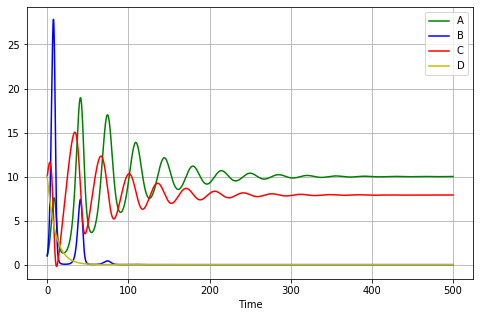

In [72]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def TheModel(Y,t):
    [A,B,C,D] = Y
    
    # per-capita growth rate scalars for resource availability
    kA = 0.02
    kB = 0.04
    # carrying capacities
    aMax = 50
    bMax = 100
    # per-capita mortality rate scalars for resource availability
    kdA = 1
    kdB = 3
    # consumption scalars for each unit of total population
    kC = 0.1
    kD = 0.1
    # per-capita growth rates
    rA = kA*(C+D)
    rB = kB*(C+D)
    
    dA_dt = rA*A*(1-A/aMax) - kdA*A/(C+D)
    dB_dt = rB*B*(1-B/bMax) - kdB*B/(C+D)
    
    dC_dt = 1 - kC*(A+B) 
    dD_dt = - kD*(D) 

    return  [dA_dt, dB_dt, dC_dt, dD_dt]


# make an array of time values for which we want to collect output
end = 500   # days
times = np.arange(0, end, 0.01)

Y = odeint(TheModel, [1.0, 1.0, 10, 10], times)

# plot results
A = Y[:,0]
B = Y[:,1]
C = Y[:,2]
D = Y[:,3]

# plot results
# first, a Time-series plot showing Human and Zombie Populations as functions of time.

plt.figure(figsize=(8,5))
plt.plot(times, A, 'g-', label='A')
plt.plot(times, B, 'b-', label='B')
plt.plot(times, C, 'r-', label='C')
plt.plot(times, D, 'y-', label='D')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()
